# Задача 1

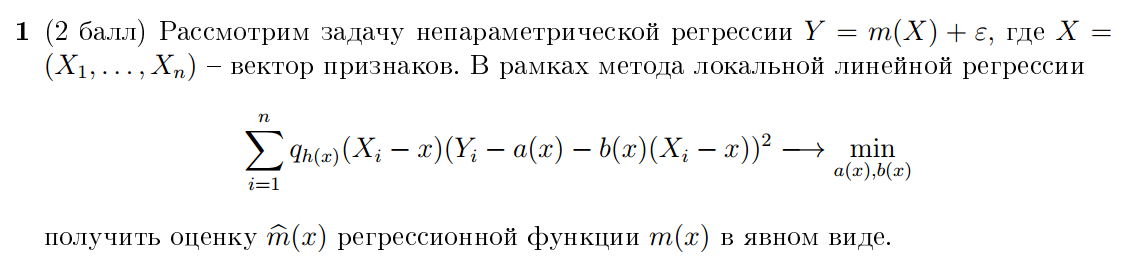

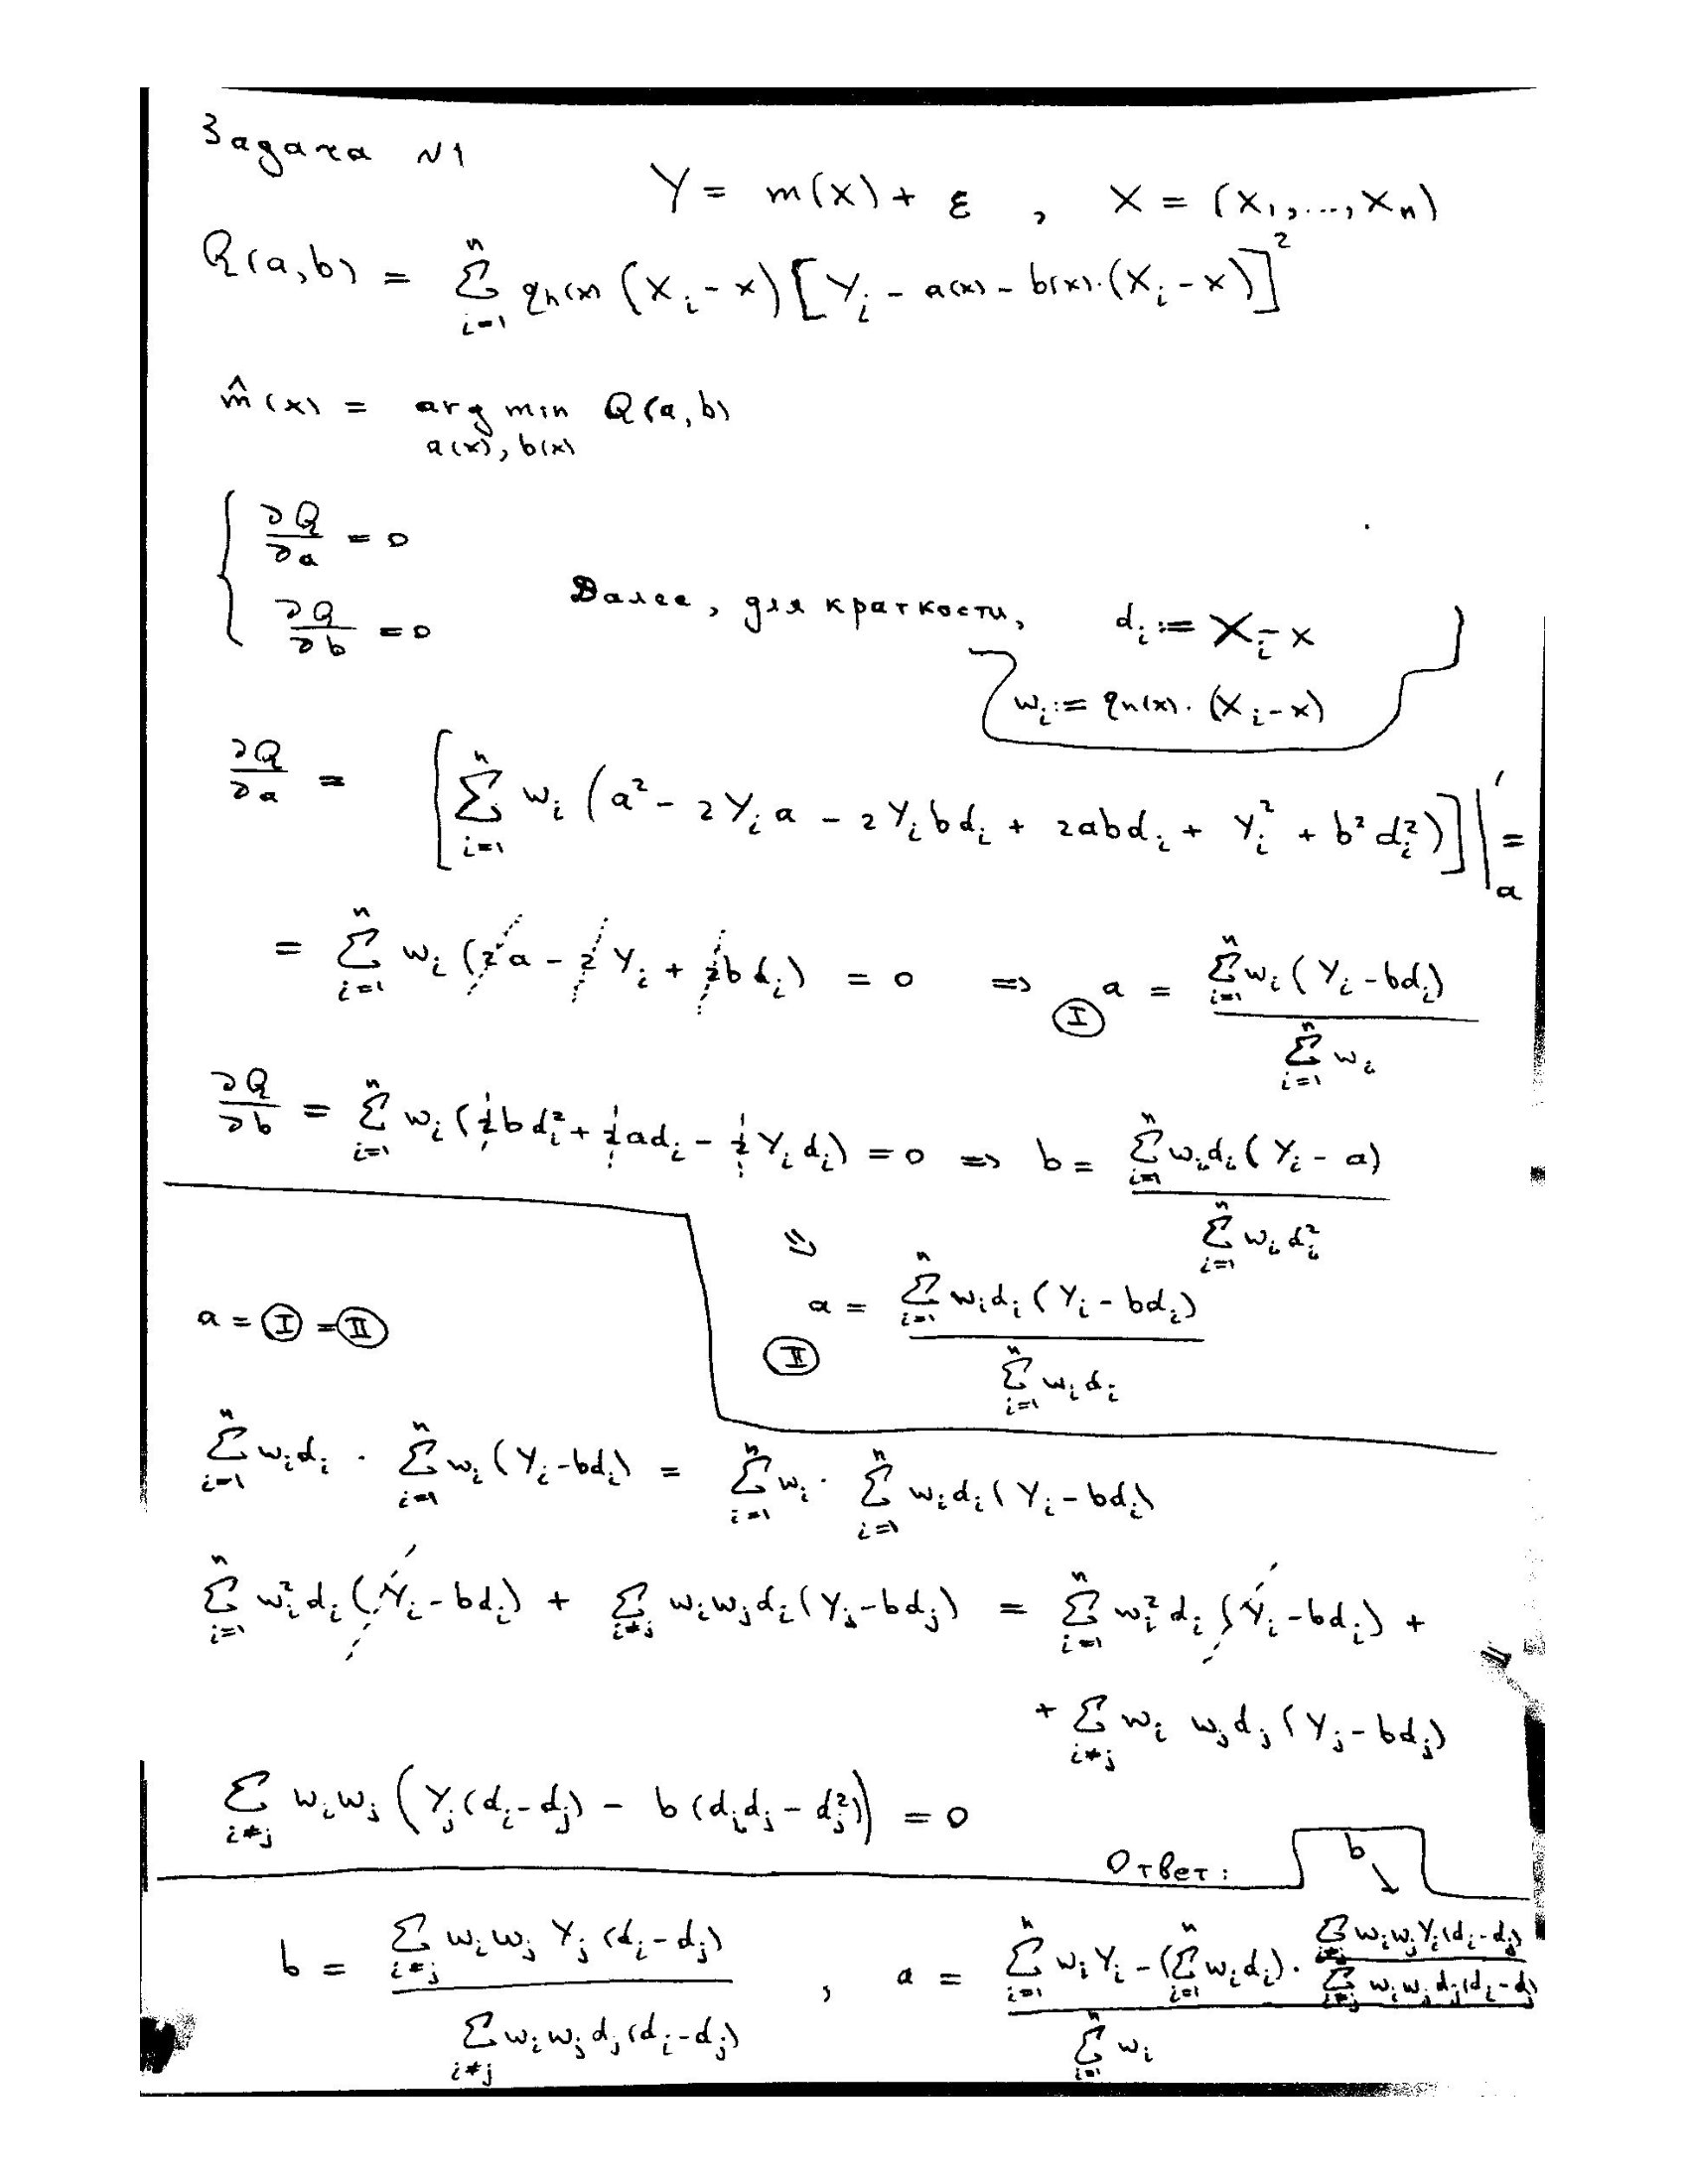

# Задача 2

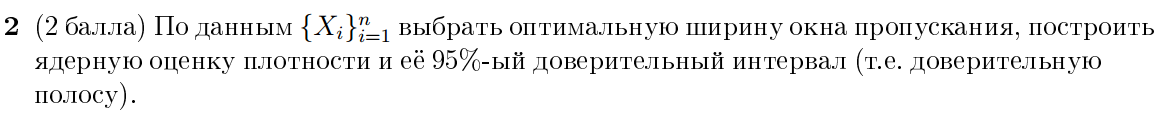

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KernelDensity
import statsmodels.nonparametric.kde as KDE
import scipy.stats as sps
sns.set(style="darkgrid")
plt.style.use("dark_background")
sns.set_palette(sns.color_palette("tab10"))

In [402]:
data = pd.DataFrame(pd.read_csv('glass.dat', sep="\s+"))
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,3.01,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,WinF
2,-0.39,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,WinF
3,-1.82,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,WinF
4,-0.34,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,WinF
5,-0.58,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,WinF
...,...,...,...,...,...,...,...,...,...,...
210,-1.77,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,Head
211,-1.15,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,Head
212,2.65,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,Head
213,-1.49,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,Head


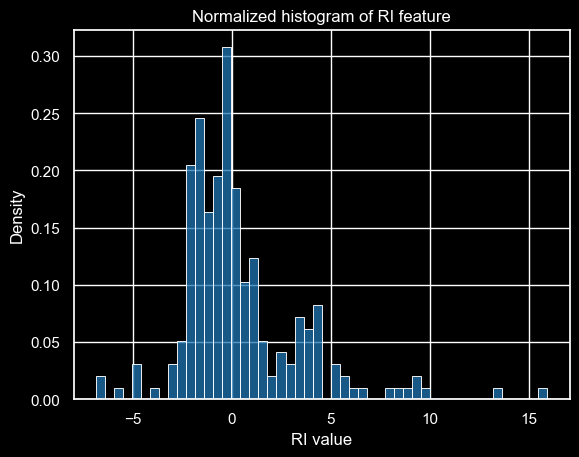

In [403]:
x = data['RI']
sns.histplot(x, bins=50, stat='density')
plt.title("Normalized histogram of RI feature")
plt.xlabel('RI value');

Посмотрим, как приближается гистограмма графиками плотности в зависимости от ширины окна пропускания(bandwidth)

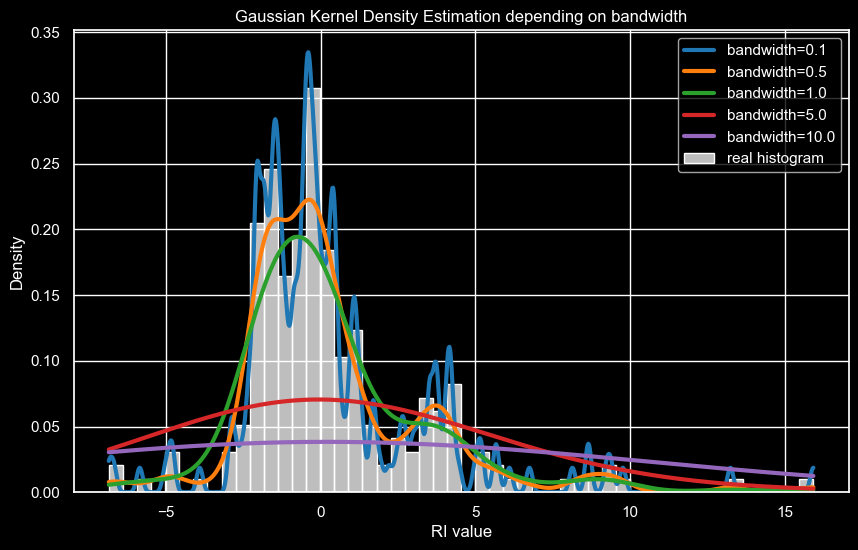

In [404]:
X = x[:, np.newaxis]
grid = np.linspace(x.min(), x.max(), 1000)
X_plot = grid[:, np.newaxis]

plt.figure(figsize=(10, 6))

for b in [0.1, 0.5, 1, 5, 10]:
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(X)
    log_dens = kde.score_samples(X_plot)
    plt.plot(X_plot[:, 0], np.exp(log_dens), lw=3, linestyle="-", label="bandwidth=%.1f" %b)
    
sns.histplot(x, bins=50, stat='density', color='white', label='real histogram')
plt.title("Gaussian Kernel Density Estimation depending on bandwidth")
plt.xlabel('RI value')
plt.legend(loc="best");

Видим, что оптимум $bandwidth \in [0.5, 1]$.
 
При больших значениях $-$ недообучение(совсем не отражается реальная зависимость), при меньших $-$ переобучение.

Выберем "на глаз" наиболее подходящее значение:

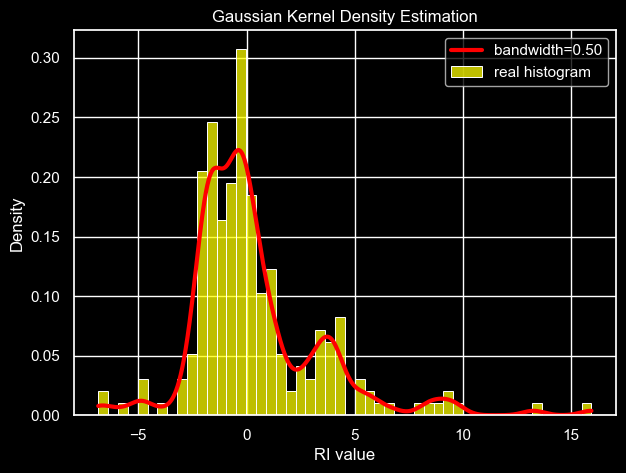

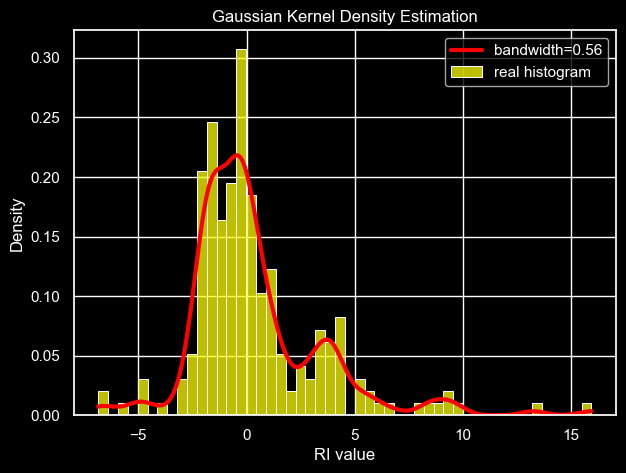

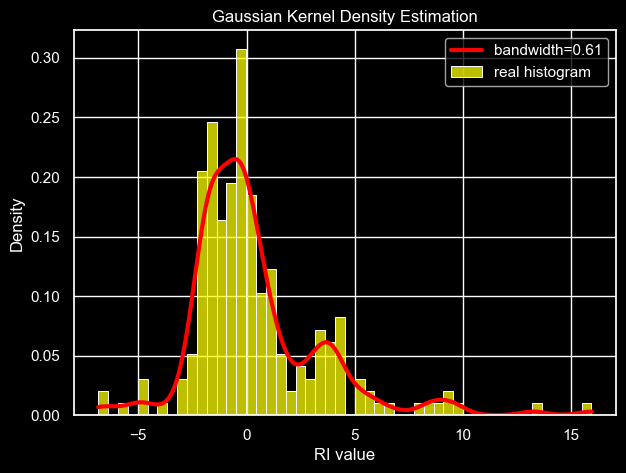

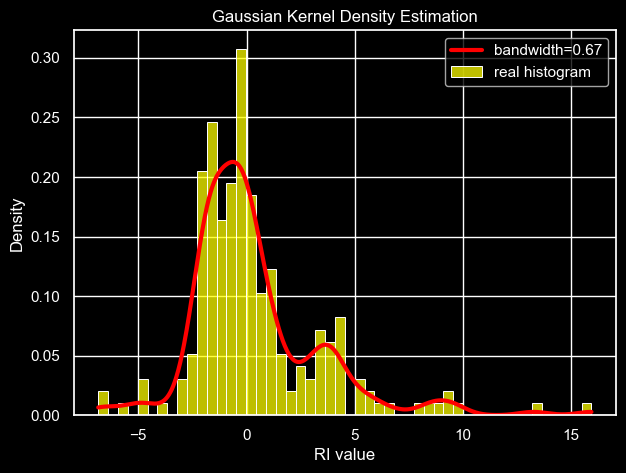

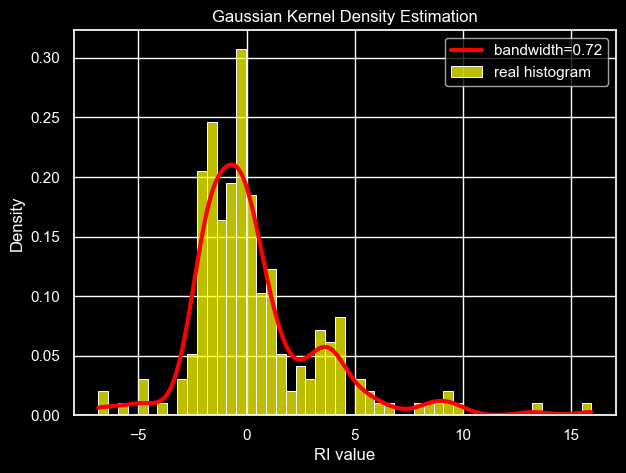

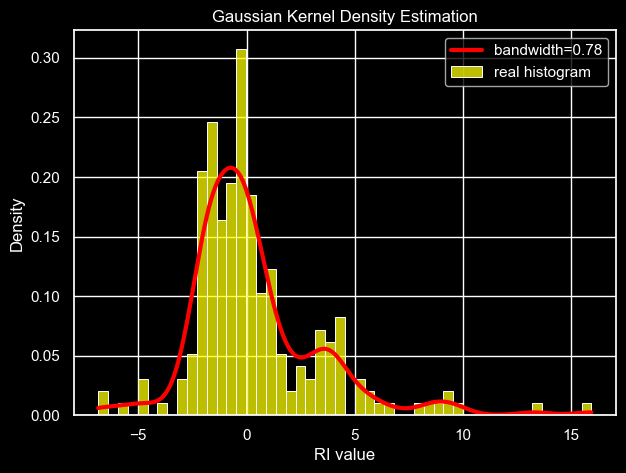

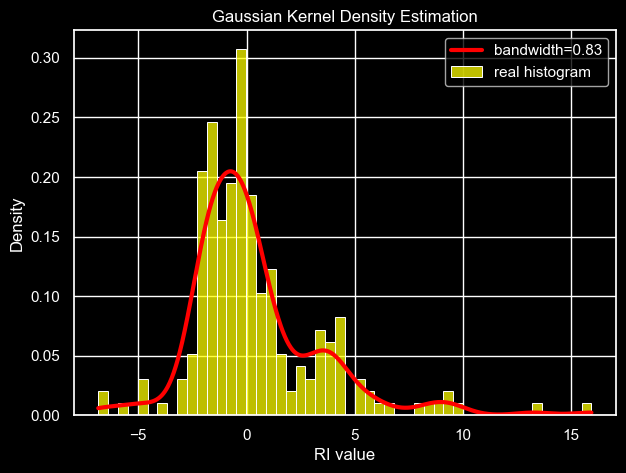

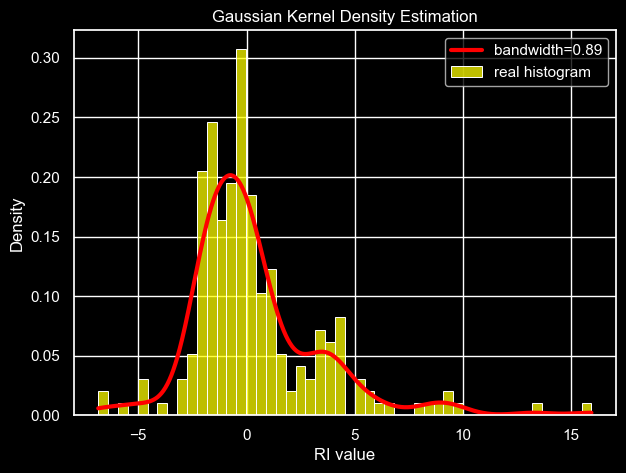

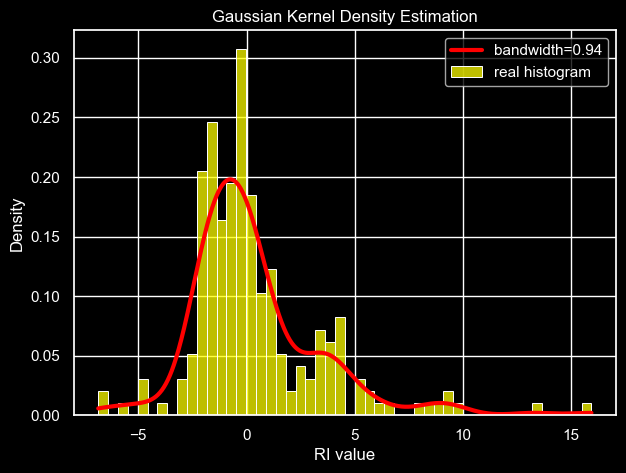

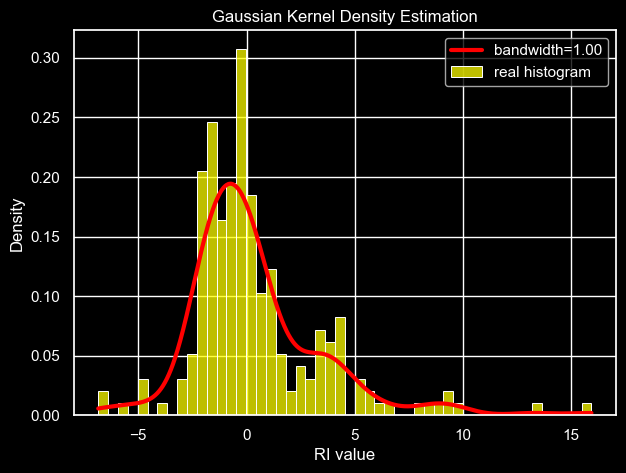

In [405]:
for b in np.linspace(0.5, 1, 10):
    plt.figure(figsize=(7, 5))
    sns.histplot(x, bins=50, stat='density', color='yellow', label='real histogram')
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(X)
    log_dens = kde.score_samples(X_plot)
    plt.plot(X_plot[:, 0], np.exp(log_dens), lw=3, linestyle="-", label="bandwidth=%.2f" %b, color='red')
    plt.xlabel('RI value')
    plt.title("Gaussian Kernel Density Estimation")
    plt.legend()

Для сравнения, можем посмотреть на готовый график плотности из seaborn

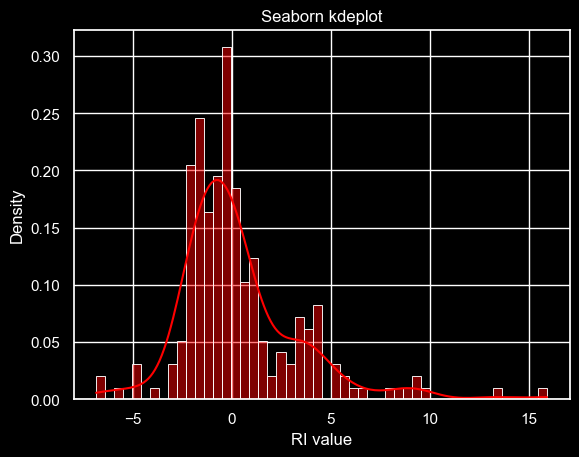

In [406]:
sns.histplot(x, bins=50, stat='density', color='red', kde=True)
plt.title("Seaborn kdeplot")
plt.xlabel('RI value');

Итого, берем $bandwidth=1$

In [407]:
kde = KDE.KDEUnivariate(x)
kde.fit(bw=1)
kde_vals = kde.evaluate(grid)

Построим доверительный интервал 

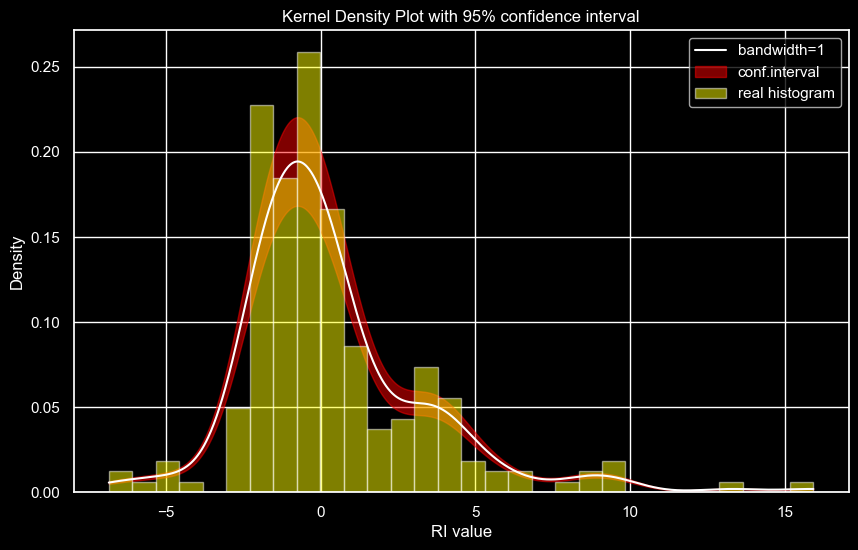

In [408]:
conf_int = sps.norm.interval(0.95, loc=0, scale=kde_vals) / np.sqrt(len(x))
plt.figure(figsize=(10, 6))
plt.plot(grid, kde_vals, label="bandwidth=1", color='white')
plt.fill_between(grid, conf_int[0] + kde_vals, conf_int[1] + kde_vals, color='red', alpha=0.5, label='conf.interval')
plt.hist(x, bins=30, alpha=0.5, density=True, color='yellow', label='real histogram')
plt.title('Kernel Density Plot with 95% confidence interval')
plt.xlabel('RI value')
plt.ylabel('Density')
plt.legend();

# Задача 3

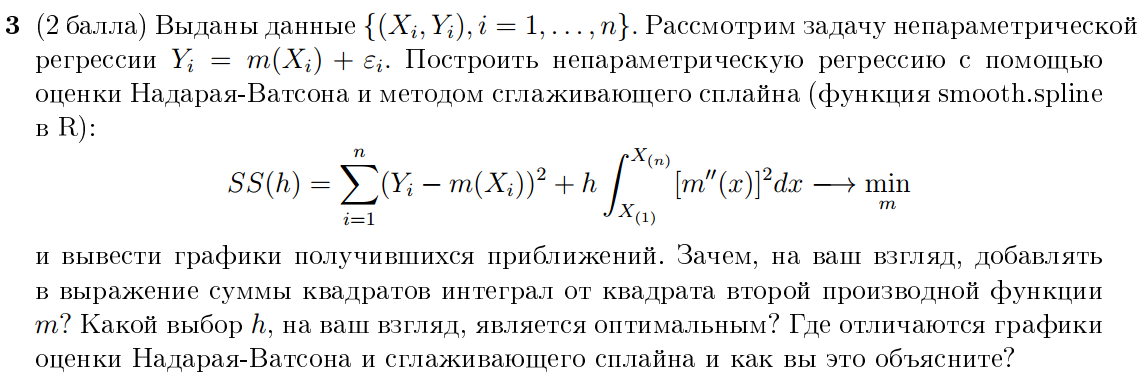

In [409]:
data = pd.read_csv('hw10t3.csv', index_col=0)
data

,y,x
0,0.064771,0.180249
1,-0.683449,-0.811201
2,0.501485,-0.616333
3,0.263588,-0.749556
4,-0.323165,-0.414561
...,...,...
295,0.189952,0.123668
296,-0.099252,0.011565
297,-0.606335,0.972131
298,-0.245234,-0.836449


In [410]:
x = data['x']
y = data['y']

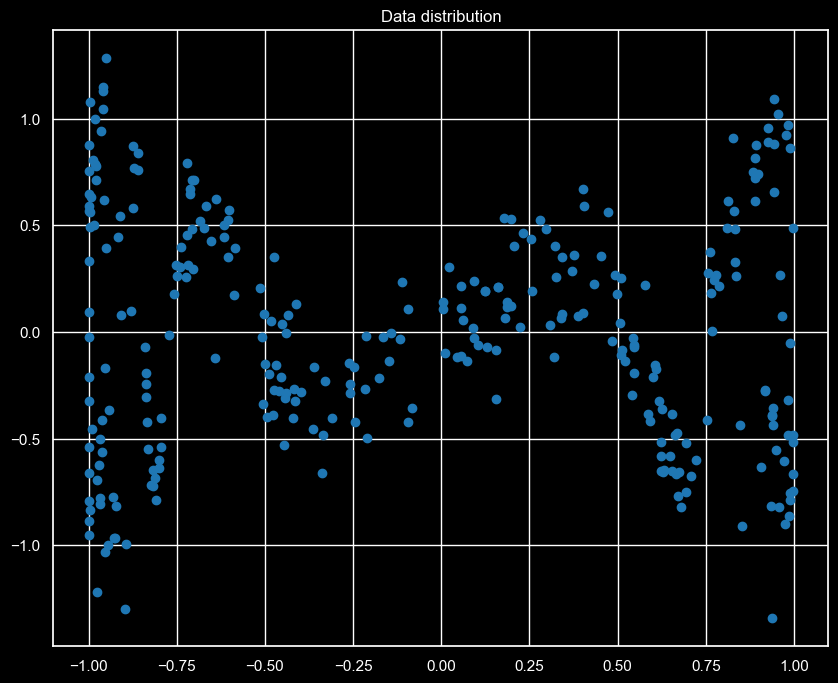

In [411]:
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.title('Data distribution');

In [412]:
x

0      0.180249
1     -0.811201
2     -0.616333
3     -0.749556
4     -0.414561
         ...   
295    0.123668
296    0.011565
297    0.972131
298   -0.836449
299   -0.475779
Name: x, Length: 300, dtype: float64

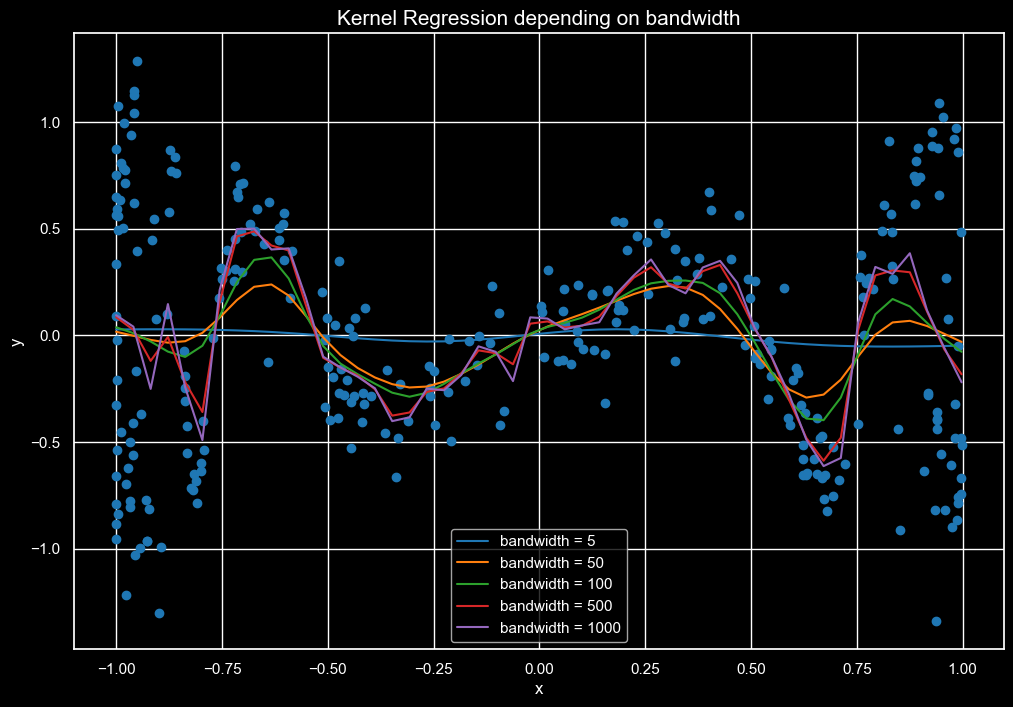

In [413]:
from kernel_regression import KernelRegression

plt.figure(figsize = (12, 8))
plt.scatter(x, y)
grid = np.linspace(x.min(), x.max())
for b in [5, 50, 100, 500, 1000]:
    KR = KernelRegression(gamma=b)
    KR.fit(np.array(x).reshape(-1, 1), y)
    plt.plot(grid, KR.predict(grid.reshape(-1, 1)), label='bandwidth = {}'.format(b))
    
plt.title("Kernel Regression depending on bandwidth", fontsize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

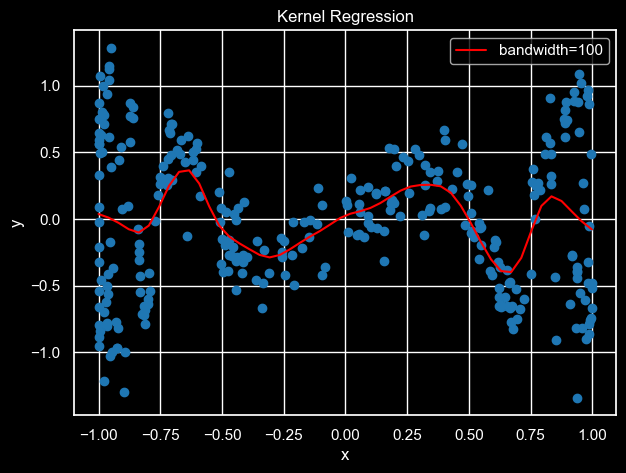

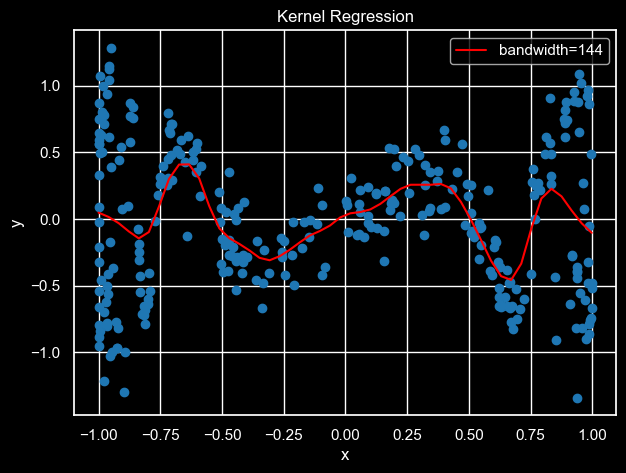

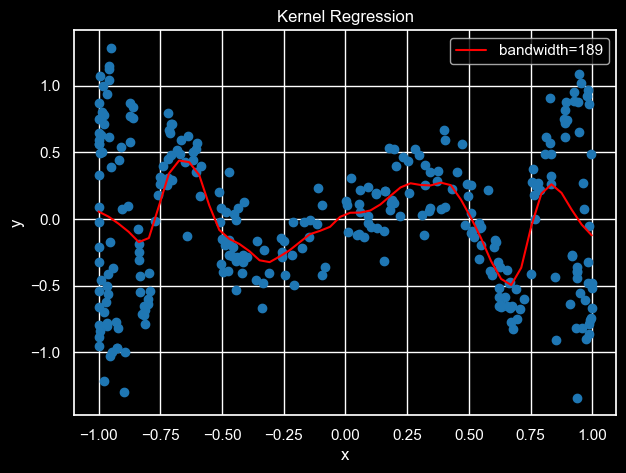

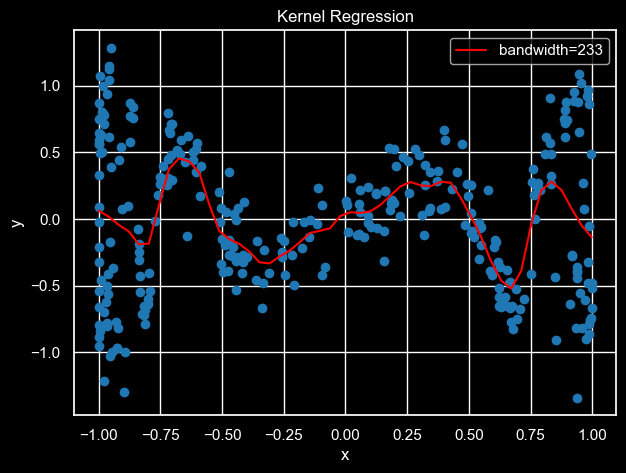

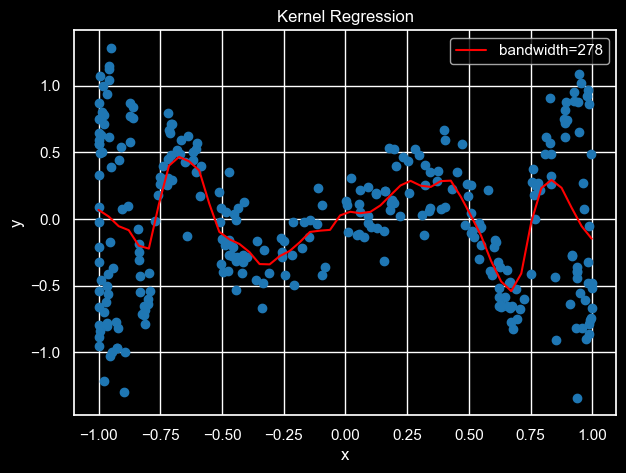

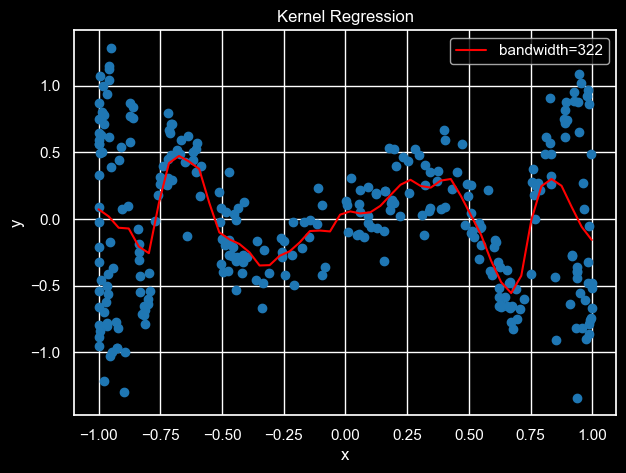

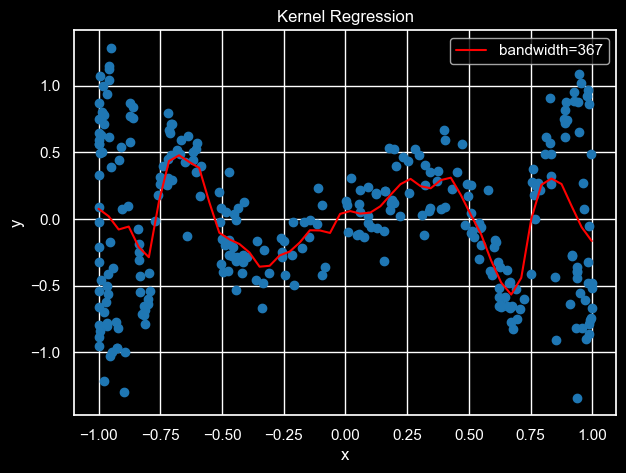

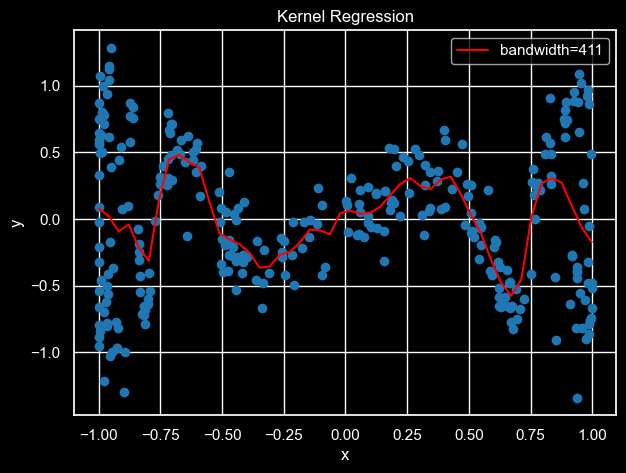

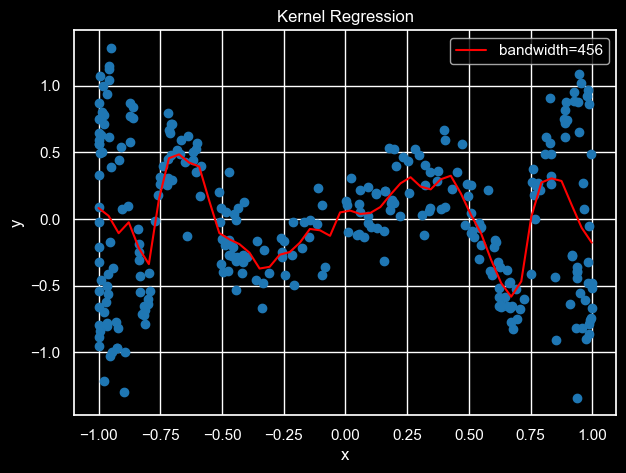

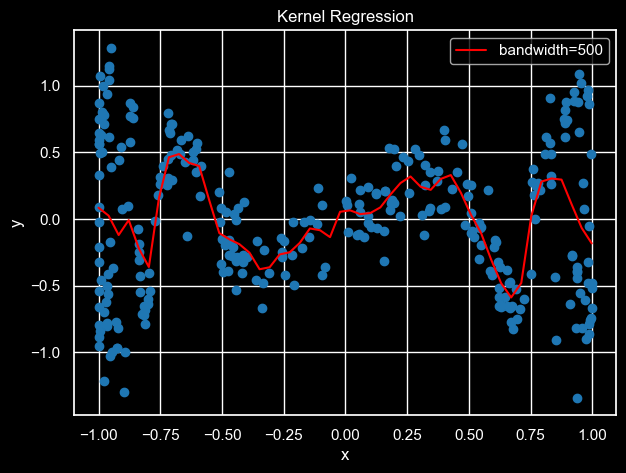

In [414]:
for b in np.linspace(100, 500, 10):
    plt.figure(figsize=(7, 5))
    plt.title("Kernel Regression")
    plt.scatter(x, y)
    KR = KernelRegression(gamma=b)
    KR.fit(np.array(x).reshape(-1, 1), y)
    plt.plot(grid, KR.predict(grid.reshape(-1, 1)), label='bandwidth=%.0f' %b, color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

Оптимальным значением считаем $bandwidth=200$

In [415]:
import rpy2.robjects as robjects
r_smooth_spline = robjects.r['smooth.spline']

ModuleNotFoundError: No module named 'rpy2'

In [ ]:
r_x = robjects.FloatVector(x)
r_y = robjects.FloatVector(y)
plt.figure(figsize = (16, 12))
plt.scatter(x, y, label='Data')
for spar in [1, 2, 3, 4]:
    spline = r_smooth_spline(x=r_x, y=r_y, df=4, spar=spar)
    y_predict = np.array(robjects.r['predict'](spline,robjects.FloatVector(x_grid)).rx2('y'))
    plt.plot(grid, y_predict, label='spar = {}'.format(spar))
    
plt.title("Сравнение параметра сглаживания", fontsize=15)
plt.legend()

# Задача 4

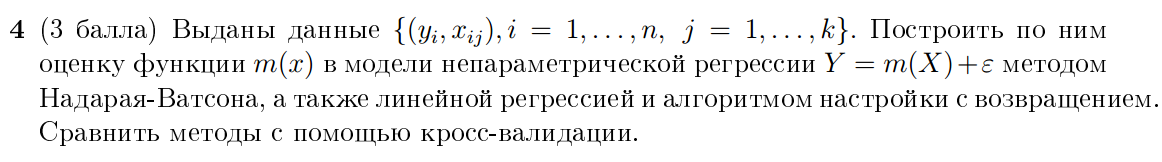

# Задача 5

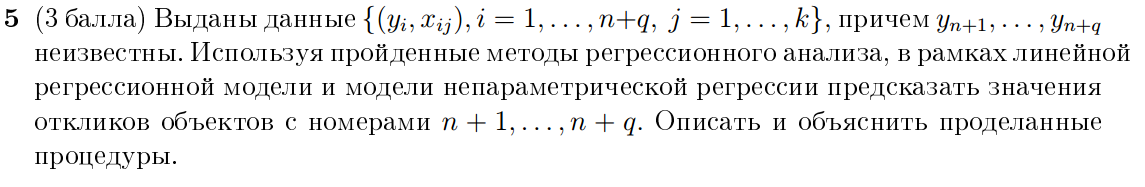